### import library

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost
from xgboost import XGBClassifier

### read dataset

In [2]:
df = pd.read_csv("heart.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


E:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

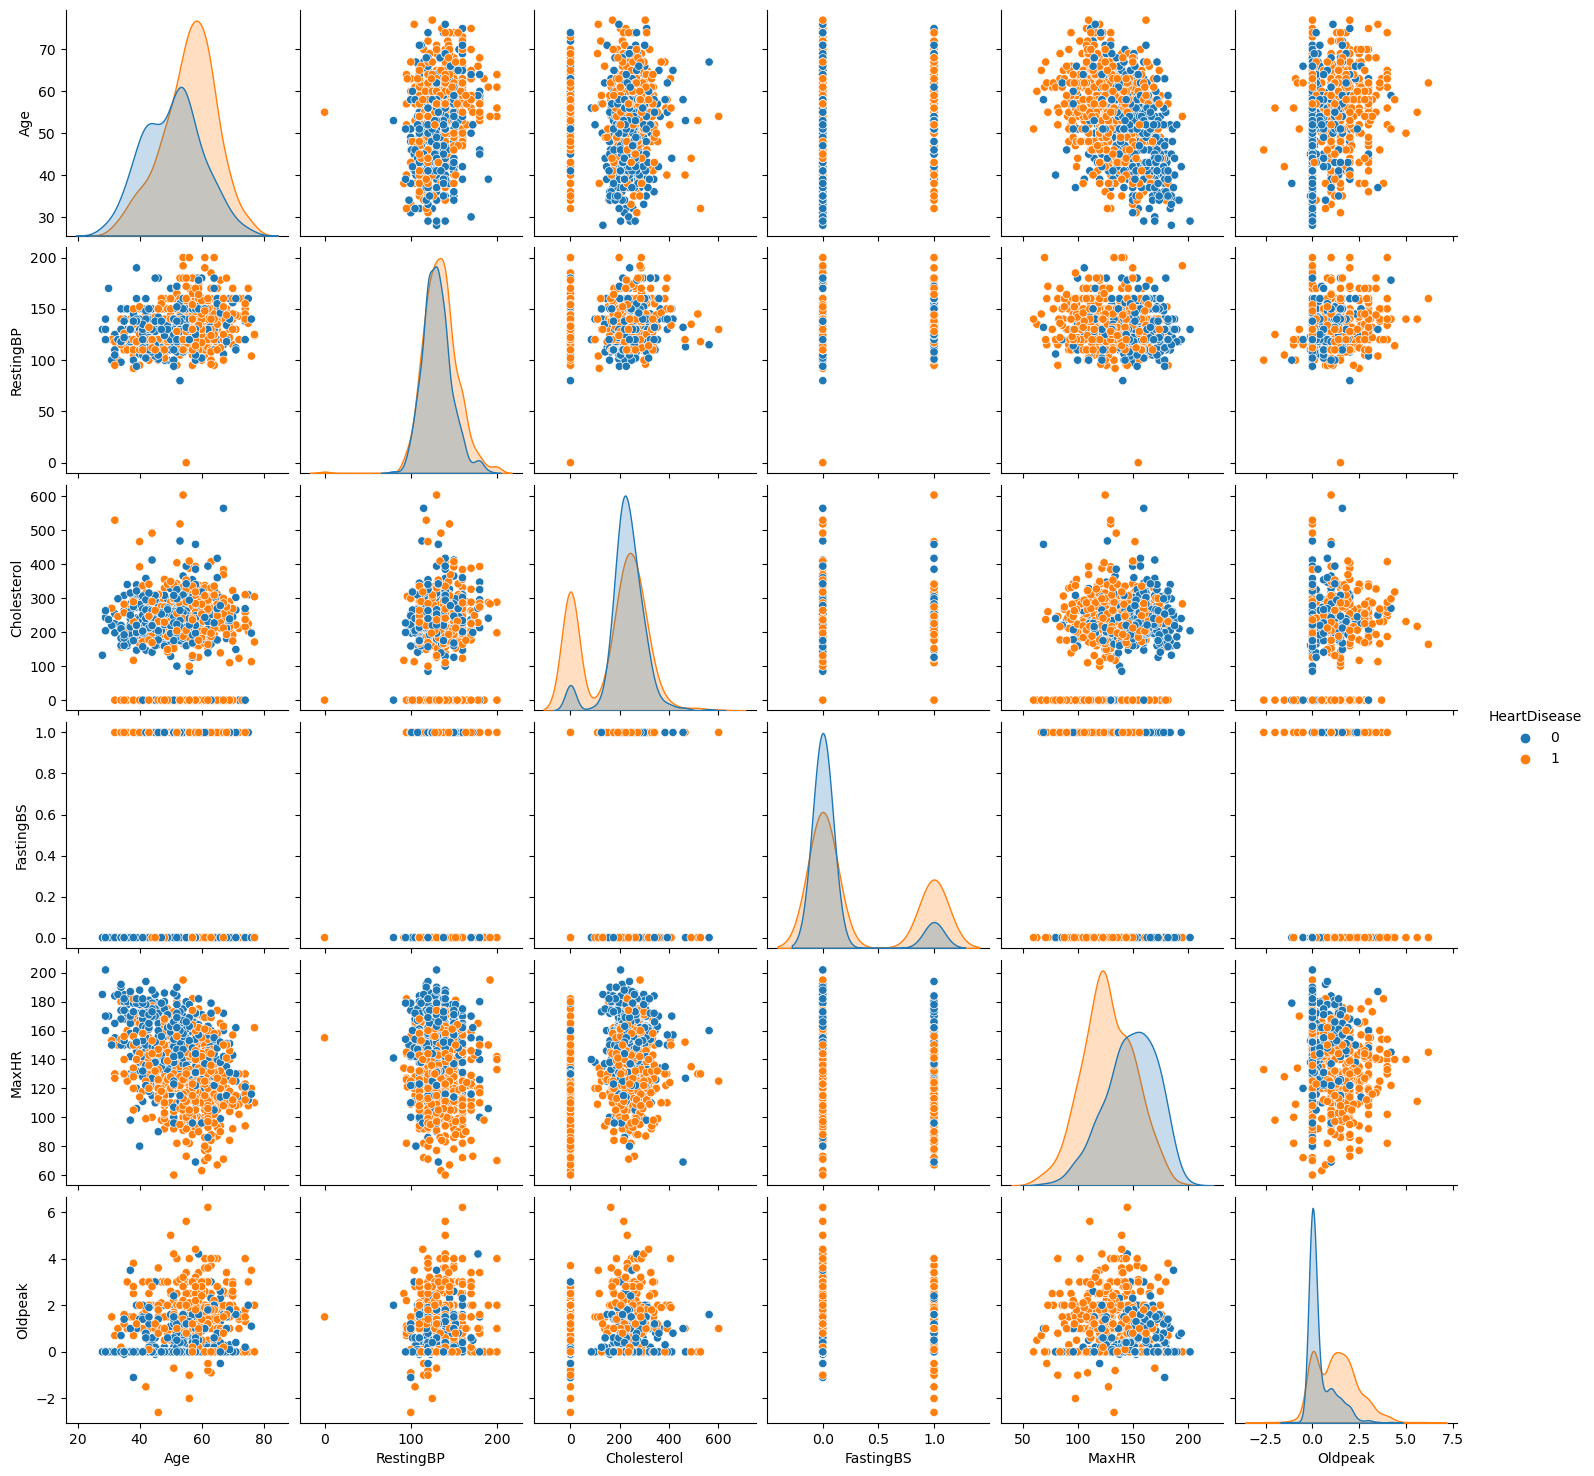

In [3]:
import seaborn as sns
sns.pairplot(df, hue = "HeartDisease")
plt.savefig("paired plot.jpg")

### data cleaning

In [4]:
df.dropna()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


### Normalization

In [5]:
from sklearn.preprocessing import MinMaxScaler
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
scaler = MinMaxScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
df['HeartDisease'] = df['HeartDisease'].astype(int)

In [6]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0.244898,M,ATA,0.70,0.479270,0.0,Normal,0.788732,N,0.295455,Up,0
1,0.428571,F,NAP,0.80,0.298507,0.0,Normal,0.676056,N,0.409091,Flat,1
2,0.183673,M,ATA,0.65,0.469320,0.0,ST,0.267606,N,0.295455,Up,0
3,0.408163,F,ASY,0.69,0.354892,0.0,Normal,0.338028,Y,0.465909,Flat,1
4,0.530612,M,NAP,0.75,0.323383,0.0,Normal,0.436620,N,0.295455,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.346939,M,TA,0.55,0.437811,0.0,Normal,0.507042,N,0.431818,Flat,1
914,0.816327,M,ASY,0.72,0.320066,1.0,Normal,0.570423,N,0.681818,Flat,1
915,0.591837,M,ASY,0.65,0.217247,0.0,Normal,0.387324,Y,0.431818,Flat,1
916,0.591837,F,ATA,0.65,0.391376,0.0,LVH,0.802817,N,0.295455,Flat,1


### Outlier Detection

In [11]:
def remove_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    conditions = ~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))
    return df[conditions]

clean_df = remove_outliers(df).dropna()

In [12]:
clean_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0.244898,1.0,1,0.70,0.479270,0.0,1.0,0.788732,0,0.295455,2,0
4,0.530612,1.0,2,0.75,0.323383,0.0,1.0,0.436620,0,0.295455,2,0
5,0.224490,1.0,2,0.60,0.562189,0.0,1.0,0.774648,0,0.295455,2,0
7,0.530612,1.0,1,0.55,0.344942,0.0,1.0,0.577465,0,0.295455,2,0
8,0.183673,1.0,0,0.70,0.343284,0.0,1.0,0.492958,1,0.465909,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
907,0.326531,1.0,0,0.60,0.280265,0.0,1.0,0.591549,1,0.613636,0,1
910,0.265306,1.0,1,0.60,0.260365,0.0,1.0,0.859155,0,0.295455,2,0
913,0.346939,1.0,3,0.55,0.437811,0.0,1.0,0.507042,0,0.431818,1,1
915,0.591837,1.0,0,0.65,0.217247,0.0,1.0,0.387324,1,0.431818,1,1


### numeric all category features

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':  
        df[column] = encoder.fit_transform(df[column])

In [10]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0.244898,1,1,0.70,0.479270,0.0,1,0.788732,0,0.295455,2,0
1,0.428571,0,2,0.80,0.298507,0.0,1,0.676056,0,0.409091,1,1
2,0.183673,1,1,0.65,0.469320,0.0,2,0.267606,0,0.295455,2,0
3,0.408163,0,0,0.69,0.354892,0.0,1,0.338028,1,0.465909,1,1
4,0.530612,1,2,0.75,0.323383,0.0,1,0.436620,0,0.295455,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.346939,1,3,0.55,0.437811,0.0,1,0.507042,0,0.431818,1,1
914,0.816327,1,0,0.72,0.320066,1.0,1,0.570423,0,0.681818,1,1
915,0.591837,1,0,0.65,0.217247,0.0,1,0.387324,1,0.431818,1,1
916,0.591837,0,1,0.65,0.391376,0.0,0,0.802817,0,0.295455,1,1


In [41]:
encoder = LabelEncoder()
for column in clean_df.columns:
    if clean_df[column].dtype == 'object':  
        clean_df[column] = encoder.fit_transform(clean_df[column])

In [42]:
clean_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0.244898,1.0,1,0.70,0.479270,0.0,1.0,0.788732,0,0.295455,2,0
4,0.530612,1.0,2,0.75,0.323383,0.0,1.0,0.436620,0,0.295455,2,0
5,0.224490,1.0,2,0.60,0.562189,0.0,1.0,0.774648,0,0.295455,2,0
7,0.530612,1.0,1,0.55,0.344942,0.0,1.0,0.577465,0,0.295455,2,0
8,0.183673,1.0,0,0.70,0.343284,0.0,1.0,0.492958,1,0.465909,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
907,0.326531,1.0,0,0.60,0.280265,0.0,1.0,0.591549,1,0.613636,0,1
910,0.265306,1.0,1,0.60,0.260365,0.0,1.0,0.859155,0,0.295455,2,0
913,0.346939,1.0,3,0.55,0.437811,0.0,1.0,0.507042,0,0.431818,1,1
915,0.591837,1.0,0,0.65,0.217247,0.0,1.0,0.387324,1,0.431818,1,1


### train & test split

In [13]:
class0 = df[df['HeartDisease'] == 0]
class1 = df[df['HeartDisease'] == 1]
features = [column_name for column_name in df.columns if column_name != 'HeartDisease']
x0 = class0[features]
y0 = class0.HeartDisease
x1 = class1[features]
y1 = class1.HeartDisease

In [14]:
x_train0, x_test0, y_train0, y_test0 = train_test_split(x0, y0, test_size = .25, random_state = 1000)
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size = .25, random_state = 1000)

In [15]:
x_train = pd.concat([x_train0, x_train1])
x_train = x_train.sample(frac=1, random_state=1)
x_test = pd.concat([x_test0, x_test1])
x_test = x_test.sample(frac=1, random_state=1)
y_train = pd.concat([y_train0, y_train1])
y_train = y_train.sample(frac=1, random_state=1)
y_test = pd.concat([y_test0, y_test1])
y_test = y_test.sample(frac=1, random_state=1)

In [16]:
class0_clean = clean_df[clean_df['HeartDisease'] == 0]
class1_clean = clean_df[clean_df['HeartDisease'] == 1]
x0_clean = class0_clean[features]
y0_clean = class0_clean.HeartDisease
x1_clean = class1_clean[features]
y1_clean = class1_clean.HeartDisease

In [17]:
x_train0_clean, x_test0_clean, y_train0_clean, y_test0_clean = train_test_split(x0_clean, y0_clean, test_size = .25, random_state = 1000)
x_train1_clean, x_test1_clean, y_train1_clean, y_test1_clean = train_test_split(x1_clean, y1_clean, test_size = .25, random_state = 1000)

In [18]:
x_train_clean = pd.concat([x_train0_clean, x_train1_clean])
x_train_clean = x_train_clean.sample(frac=1, random_state=1)
x_test_clean = pd.concat([x_test0_clean, x_test1_clean])
x_test_clean = x_test_clean.sample(frac=1, random_state=1)
y_train_clean = pd.concat([y_train0_clean, y_train1_clean])
y_train_clean = y_train_clean.sample(frac=1, random_state=1)
y_test_clean = pd.concat([y_test0_clean, y_test1_clean])
y_test_clean = y_test_clean.sample(frac=1, random_state=1)

### Decision Tree
#### implementation

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
decision_tree_model = DecisionTreeClassifier(criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=10, min_samples_leaf=5,
            min_samples_split=2)
decision_tree_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=7, max_leaf_nodes=10, min_samples_leaf=5)

In [15]:
decision_tree_pred = decision_tree_model.predict(x_test)

In [16]:
metrics.accuracy_score(y_test, decision_tree_pred)

0.8391304347826087

In [17]:
decision_tree_recall = recall_score(y_test, decision_tree_pred)
decision_tree_recall

0.8582677165354331

### Decision Tree
#### adjuestment

In [18]:
depth_lst = range(2, 10)
leaf_nodes_lst = range(2, 20)
min_samples_leaf_lst = range(2, 10)
min_samples_split_lst = range(2, 10)
accuracy_lst = []
recall_lst = []

In [19]:
improve_depth_lst = []
improve_leaf_nodes = []
improve_samples_leaf = []
improve_samples_split = []
for depth in depth_lst:
    for leaf_nodes in leaf_nodes_lst:
        for samples_leaf in min_samples_leaf_lst:
            for samples_split in min_samples_split_lst:
                decision_tree_model = DecisionTreeClassifier(criterion='gini', max_depth=depth,
                                                            max_features=None, max_leaf_nodes=leaf_nodes, min_samples_leaf=samples_leaf,
                                                            min_samples_split=samples_split)
                decision_tree_model.fit(x_train, y_train)
                decision_tree_pred = decision_tree_model.predict(x_test)
                accuracy_lst.append(metrics.accuracy_score(y_test, decision_tree_pred))
                recall_lst.append(recall_score(y_test, decision_tree_pred))
                improve_depth_lst.append(depth)
                improve_leaf_nodes.append(leaf_nodes)
                improve_samples_leaf.append(samples_leaf)
                improve_samples_split.append(samples_split)

In [54]:
decision_adjustment_table = pd.DataFrame({
    'max_depth' : improve_depth_lst,
    'max_leaf_nodes' : improve_leaf_nodes,
    'min_samples_leaf' : improve_samples_leaf,
    'min_samples_split' : improve_samples_split,
    'accuracy' : accuracy_lst,
    'recall' : recall_lst
})
decision_adjustment_table.sort_values(by=['accuracy'], ascending=False)
decision_adjustment_table.to_csv("decision_tree_final_table.csv")
decision_adjustment_table

,max_depth,max_leaf_nodes,min_samples_leaf,min_samples_split,accuracy,recall
0,2,2,2,2,0.900000,0.878788
1,2,2,2,3,0.900000,0.878788
2,2,2,2,4,0.900000,0.878788
3,2,2,2,5,0.900000,0.878788
4,2,2,2,6,0.900000,0.878788
...,...,...,...,...,...,...
18427,9,19,9,5,0.885714,0.848485
18428,9,19,9,6,0.885714,0.848485
18429,9,19,9,7,0.885714,0.848485
18430,9,19,9,8,0.885714,0.848485


In [55]:
row_index = decision_adjustment_table['accuracy'].idxmax()
k = decision_adjustment_table[decision_adjustment_table['accuracy'] == decision_adjustment_table['accuracy'].max()]
row_index = k['recall'].idxmax()
k = k[k['recall'] == k['recall'].max()]
k

,max_depth,max_leaf_nodes,min_samples_leaf,min_samples_split,accuracy,recall
11909,4,8,2,7,0.914286,0.909091
12229,4,13,2,7,0.914286,0.909091
12230,4,13,2,8,0.914286,0.909091
12293,4,14,2,7,0.914286,0.909091
12294,4,14,2,8,0.914286,0.909091
12357,4,15,2,7,0.914286,0.909091
12358,4,15,2,8,0.914286,0.909091
12421,4,16,2,7,0.914286,0.909091
12422,4,16,2,8,0.914286,0.909091
12485,4,17,2,7,0.914286,0.909091


In [56]:
#no outlier 

In [52]:
improve_depth_lst = []
improve_leaf_nodes = []
improve_samples_leaf = []
improve_samples_split = []
accuracy_lst = []
recall_lst = []
for depth in depth_lst:
    for leaf_nodes in leaf_nodes_lst:
        for samples_leaf in min_samples_leaf_lst:
            for samples_split in min_samples_split_lst:
                decision_tree_model = DecisionTreeClassifier(criterion='gini', max_depth=depth,
                                                            max_features=None, max_leaf_nodes=leaf_nodes, min_samples_leaf=samples_leaf,
                                                            min_samples_split=samples_split)
                decision_tree_model.fit(x_train_clean, y_train_clean)
                decision_tree_pred = decision_tree_model.predict(x_test_clean)
                accuracy_lst.append(metrics.accuracy_score(y_test_clean, decision_tree_pred))
                recall_lst.append(recall_score(y_test_clean, decision_tree_pred))
                improve_depth_lst.append(depth)
                improve_leaf_nodes.append(leaf_nodes)
                improve_samples_leaf.append(samples_leaf)
                improve_samples_split.append(samples_split)

In [57]:
decision_adjustment_table_clean = pd.DataFrame({
    'max_depth' : improve_depth_lst,
    'max_leaf_nodes' : improve_leaf_nodes,
    'min_samples_leaf' : improve_samples_leaf,
    'min_samples_split' : improve_samples_split,
    'accuracy' : accuracy_lst,
    'recall' : recall_lst
})
decision_adjustment_table_clean = decision_adjustment_table_clean.sort_values(by=['accuracy'], ascending=False)
decision_adjustment_table_clean.to_csv("decision_tree_final_table_clean.csv")
decision_adjustment_table_clean

,max_depth,max_leaf_nodes,min_samples_leaf,min_samples_split,accuracy,recall
12550,4,18,2,8,0.914286,0.909091
12229,4,13,2,7,0.914286,0.909091
12486,4,17,2,8,0.914286,0.909091
12485,4,17,2,7,0.914286,0.909091
12613,4,19,2,7,0.914286,0.909091
...,...,...,...,...,...,...
16849,8,13,4,3,0.871429,0.818182
16850,8,13,4,4,0.871429,0.818182
16851,8,13,4,5,0.871429,0.818182
16852,8,13,4,6,0.871429,0.818182


In [58]:
row_index = decision_adjustment_table_clean['accuracy'].idxmax()
k = decision_adjustment_table_clean[decision_adjustment_table_clean['accuracy'] == decision_adjustment_table_clean['accuracy'].max()]
row_index = k['recall'].idxmax()
k = k[k['recall'] == k['recall'].max()]
k

,max_depth,max_leaf_nodes,min_samples_leaf,min_samples_split,accuracy,recall
12550,4,18,2,8,0.914286,0.909091
12229,4,13,2,7,0.914286,0.909091
12486,4,17,2,8,0.914286,0.909091
12485,4,17,2,7,0.914286,0.909091
12613,4,19,2,7,0.914286,0.909091
12614,4,19,2,8,0.914286,0.909091
12422,4,16,2,8,0.914286,0.909091
12421,4,16,2,7,0.914286,0.909091
12358,4,15,2,8,0.914286,0.909091
12357,4,15,2,7,0.914286,0.909091


### Decision Tree
#### cross validation

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [60]:
x,y = df[features], df.HeartDisease

In [61]:
num_cv = range(5, 30)
avg_accuracy_lst = []
for i in num_cv:
    decision_tree_model = DecisionTreeClassifier(criterion='gini', max_depth=3,
                max_features=None, max_leaf_nodes=7, min_samples_leaf=8,
                min_samples_split=2)
    scores = cross_val_score(decision_tree_model, x, y, cv=i)
    avg_accuracy_lst.append(scores.mean())
decision_tree_cv_table = pd.DataFrame({
    'num_cv':num_cv,
    'accuracy':avg_accuracy_lst
})
decision_tree_cv_table = decision_tree_cv_table.sort_values(by=['accuracy'], ascending=False)
decision_tree_cv_table

,num_cv,accuracy
15,20,0.818986
17,22,0.818499
11,16,0.815544
12,17,0.814815
0,5,0.814689
21,26,0.812210
16,21,0.812016
13,18,0.811547
14,19,0.811292
19,24,0.811207


In [62]:
#no outliers

In [63]:
x,y = clean_df[features], clean_df.HeartDisease

In [64]:
num_cv = range(5, 30)
avg_accuracy_lst = []
for i in num_cv:
    decision_tree_model = DecisionTreeClassifier(criterion='gini', max_depth=4,
                max_features=None, max_leaf_nodes=18, min_samples_leaf=2,
                min_samples_split=8)
    scores = cross_val_score(decision_tree_model, x, y, cv=i)
    avg_accuracy_lst.append(scores.mean())
decision_tree_cv_table_clean = pd.DataFrame({
    'num_cv':num_cv,
    'accuracy':avg_accuracy_lst
})
decision_tree_cv_table_clean = decision_tree_cv_table_clean.sort_values(by=['accuracy'], ascending=False)
decision_tree_cv_table_clean

,num_cv,accuracy
18,23,0.866778
17,22,0.863928
20,25,0.859394
16,21,0.858713
23,28,0.851190
8,13,0.851149
12,17,0.850995
22,27,0.850842
21,26,0.849301
13,18,0.846991


### Decision Tree
#### plot

In [66]:
from sklearn import tree

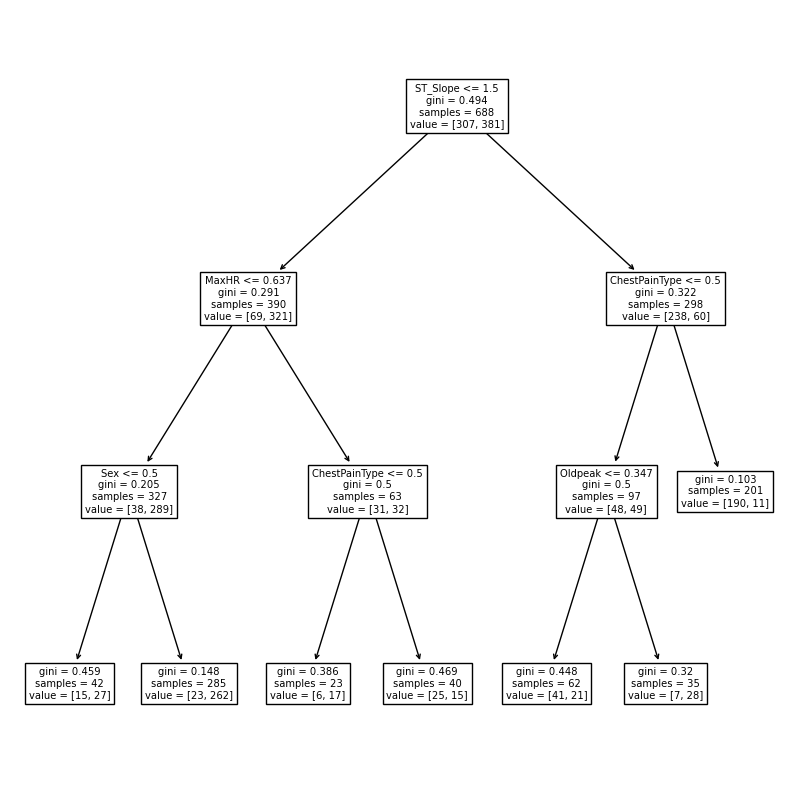

In [68]:
decision_tree_model = DecisionTreeClassifier(criterion='gini', max_depth=3,
                max_features=None, max_leaf_nodes=7, min_samples_leaf=8,
                min_samples_split=2)
decision_tree_model.fit(x_train, y_train)
fig = plt.figure(figsize = (10, 10))
tree.plot_tree(decision_tree_model, feature_names = features)
plt.savefig("decision_tree.jpg")
plt.show()

In [69]:
#no outlier

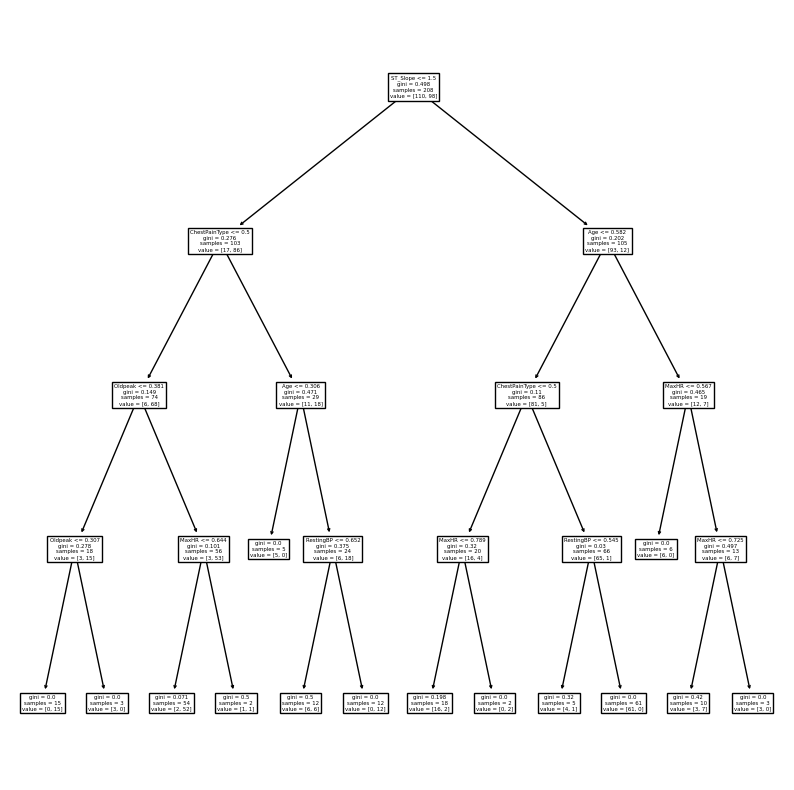

In [70]:
decision_tree_model = DecisionTreeClassifier(criterion='gini', max_depth=4,
                max_features=None, max_leaf_nodes=18, min_samples_leaf=2,
                min_samples_split=8)
decision_tree_model.fit(x_train_clean, y_train_clean)
fig = plt.figure(figsize = (10, 10))
tree.plot_tree(decision_tree_model, feature_names = features)
plt.savefig("decision_tree_clean.jpg")
plt.show()

### Random Forest
#### implementation

In [31]:
rf_classifier = RandomForestClassifier(n_estimators=200, max_depth = 5, min_samples_split = 2, 
                                       min_samples_leaf = 2, max_leaf_nodes = 10,  random_state=1000).fit(x_train,y_train)


In [32]:
rf_classifier.score(x_test, y_test)

0.8478260869565217

### Random Forest
#### adjuestment

In [35]:
improve_depth_lst = []
improve_leaf_nodes = []
improve_samples_leaf = []
improve_samples_split = []
improve_estimater_lst = []
accuracy_lst = []
recall_lst = []
count = 0
for n in range(100, 200, 20):
    for depth in range(2, 10):
        for leaf_nodes in range(2, 20):
            for samples_leaf in range(2, 10):
                for samples_split in range(2, 10):
                    count += 1
                    print (count)
                    rf_classifier = RandomForestClassifier(n_estimators=n, max_depth = depth, min_samples_split = samples_split, 
                                       min_samples_leaf = samples_leaf, max_leaf_nodes = leaf_nodes,  random_state=1000).fit(x_train,y_train)
                    rf_pred = rf_classifier.predict(x_test)
                    accuracy_lst.append(rf_classifier.score(x_test, y_test))
                    recall_lst.append(recall_score(y_test, rf_pred))
                    improve_depth_lst.append(depth)
                    improve_leaf_nodes.append(leaf_nodes)
                    improve_samples_leaf.append(samples_leaf)
                    improve_samples_split.append(samples_split)
                    improve_estimater_lst.append(n)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [36]:
random_forest_adjustment_table = pd.DataFrame({
    'n_estimator': improve_estimater_lst,
    'max_depth' : improve_depth_lst,
    'max_leaf_nodes' : improve_leaf_nodes,
    'min_samples_leaf' : improve_samples_leaf,
    'min_samples_split' : improve_samples_split,
    'accuracy' : accuracy_lst,
    'recall' : recall_lst
})
random_forest_adjustment_table.sort_values(by=['accuracy', 'recall'], ascending=[False, False])
random_forest_adjustment_table.to_csv("random_forest_final_table.csv")
random_forest_adjustment_table

,n_estimator,max_depth,max_leaf_nodes,min_samples_leaf,min_samples_split,accuracy,recall
0,100,2,2,2,2,0.839130,0.905512
1,100,2,2,2,3,0.839130,0.905512
2,100,2,2,2,4,0.839130,0.905512
3,100,2,2,2,5,0.839130,0.905512
4,100,2,2,2,6,0.839130,0.905512
...,...,...,...,...,...,...,...
46075,180,9,19,9,5,0.852174,0.913386
46076,180,9,19,9,6,0.852174,0.913386
46077,180,9,19,9,7,0.852174,0.913386
46078,180,9,19,9,8,0.852174,0.913386


In [39]:
row_index = random_forest_adjustment_table['accuracy'].idxmax()
k = random_forest_adjustment_table[random_forest_adjustment_table['accuracy'] == random_forest_adjustment_table['accuracy'].max()]
row_index = k['recall'].idxmax()
k = k[k['recall'] == k['recall'].max()]
k

,n_estimator,max_depth,max_leaf_nodes,min_samples_leaf,min_samples_split,accuracy,recall
4495,100,5,18,3,9,0.865217,0.92126
4559,100,5,19,3,9,0.865217,0.92126
4567,100,5,19,4,9,0.865217,0.92126
5704,100,6,19,3,2,0.865217,0.92126
5705,100,6,19,3,3,0.865217,0.92126
5706,100,6,19,3,4,0.865217,0.92126
5707,100,6,19,3,5,0.865217,0.92126
5708,100,6,19,3,6,0.865217,0.92126
5709,100,6,19,3,7,0.865217,0.92126
6799,100,7,18,3,9,0.865217,0.92126


In [37]:
#no outlier

In [40]:
improve_depth_lst = []
improve_leaf_nodes = []
improve_samples_leaf = []
improve_samples_split = []
improve_estimater_lst = []
accuracy_lst = []
recall_lst = []

count = 1
for n in range(100, 200, 50):
    for depth in range(2, 10):
        for leaf_nodes in range(2, 20):
            for samples_leaf in range(2, 10):
                for samples_split in range(2, 10):
                    print(count)
                    count += 1
                    rf_classifier = RandomForestClassifier(n_estimators=n, max_depth = depth, min_samples_split = samples_split, 
                                       min_samples_leaf = samples_leaf, max_leaf_nodes = leaf_nodes,  random_state=1000).fit(x_train_clean,y_train_clean)
                    rf_pred = rf_classifier.predict(x_test_clean)
                    accuracy_lst.append(rf_classifier.score(x_test_clean, y_test_clean))
                    recall_lst.append(recall_score(y_test_clean, rf_pred))
                    improve_depth_lst.append(depth)
                    improve_leaf_nodes.append(leaf_nodes)
                    improve_samples_leaf.append(samples_leaf)
                    improve_samples_split.append(samples_split)
                    improve_estimater_lst.append(n)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [41]:
random_forest_adjustment_table_clean = pd.DataFrame({
    'n_estimator': improve_estimater_lst,
    'max_depth' : improve_depth_lst,
    'max_leaf_nodes' : improve_leaf_nodes,
    'min_samples_leaf' : improve_samples_leaf,
    'min_samples_split' : improve_samples_split,
    'accuracy' : accuracy_lst,
    'recall' : recall_lst
})
random_forest_adjustment_table_clean.sort_values(by=['accuracy', 'recall'], ascending=[False, False])
random_forest_adjustment_table_clean.to_csv("random_forest_final_table_clean.csv")
random_forest_adjustment_table_clean

,n_estimator,max_depth,max_leaf_nodes,min_samples_leaf,min_samples_split,accuracy,recall
0,100,2,2,2,2,0.900000,0.878788
1,100,2,2,2,3,0.900000,0.878788
2,100,2,2,2,4,0.900000,0.878788
3,100,2,2,2,5,0.900000,0.878788
4,100,2,2,2,6,0.900000,0.878788
...,...,...,...,...,...,...,...
18427,150,9,19,9,5,0.885714,0.848485
18428,150,9,19,9,6,0.885714,0.848485
18429,150,9,19,9,7,0.885714,0.848485
18430,150,9,19,9,8,0.885714,0.848485


In [42]:
row_index = random_forest_adjustment_table_clean['accuracy'].idxmax()
k = random_forest_adjustment_table_clean[random_forest_adjustment_table_clean['accuracy'] == random_forest_adjustment_table_clean['accuracy'].max()]
row_index = k['recall'].idxmax()
k = k[k['recall'] == k['recall'].max()]
k

,n_estimator,max_depth,max_leaf_nodes,min_samples_leaf,min_samples_split,accuracy,recall
11909,150,4,8,2,7,0.914286,0.909091
12229,150,4,13,2,7,0.914286,0.909091
12230,150,4,13,2,8,0.914286,0.909091
12293,150,4,14,2,7,0.914286,0.909091
12294,150,4,14,2,8,0.914286,0.909091
12357,150,4,15,2,7,0.914286,0.909091
12358,150,4,15,2,8,0.914286,0.909091
12421,150,4,16,2,7,0.914286,0.909091
12422,150,4,16,2,8,0.914286,0.909091
12485,150,4,17,2,7,0.914286,0.909091


### Random Forest
#### cross validation

In [46]:
x,y = df[features], df.HeartDisease

In [47]:
from sklearn.model_selection import cross_val_score
num_cv = range(5, 30)
avg_accuracy_lst = []
for i in num_cv:
    random_forest_model = RandomForestClassifier(n_estimators=100, max_depth = 5, min_samples_split = 9, 
                                       min_samples_leaf = 3, max_leaf_nodes = 18,  random_state=1000)
    scores = cross_val_score(random_forest_model, x, y, cv=i)
    avg_accuracy_lst.append(scores.mean())
random_forest_cv_table = pd.DataFrame({
    'num_cv':num_cv,
    'accuracy':avg_accuracy_lst
})
random_forest_cv_table = random_forest_cv_table.sort_values(by=['accuracy'], ascending=False)
random_forest_cv_table

,num_cv,accuracy
20,25,0.870781
24,29,0.868465
21,26,0.867674
13,18,0.867102
18,23,0.866918
23,28,0.866443
15,20,0.864734
19,24,0.864626
14,19,0.863431
17,22,0.863188


In [ ]:
# no ourliers

In [72]:
x,y = clean_df[features], clean_df.HeartDisease

In [73]:
num_cv = range(5, 30)
avg_accuracy_lst = []
for i in num_cv:
    random_forest_model = RandomForestClassifier(n_estimators=150, max_depth = 4, min_samples_split = 7, 
                                       min_samples_leaf = 2, max_leaf_nodes = 8,  random_state=1000)
    scores = cross_val_score(random_forest_model, x, y, cv=i)
    avg_accuracy_lst.append(scores.mean())
decision_tree_cv_table_clean = pd.DataFrame({
    'num_cv':num_cv,
    'accuracy':avg_accuracy_lst
})
decision_tree_cv_table_clean = decision_tree_cv_table_clean.sort_values(by=['accuracy'], ascending=False)
decision_tree_cv_table_clean

,num_cv,accuracy
1,6,0.880974
5,10,0.876984
12,17,0.876298
13,18,0.875694
14,19,0.874185
6,11,0.873566
8,13,0.872960
9,14,0.872932
23,28,0.872619
11,16,0.872549


### Bagging
#### implementation

In [76]:
bag1 = BaggingClassifier(n_estimators = 100, bootstrap = True, bootstrap_features = True,random_state = 1000).fit(x_train, y_train)
bag1.score(x_test, y_test)

0.8434782608695652

### Bagging
#### adjustment

In [81]:
n_lst = []
boot_strap_lst = []
boot_strap_features_lst = []
accuracy_lst = []
recall_lst = []
for n in range(100, 500, 50):
    for bootstrap_choice in [True, False]:
        for bootstrap_features_choice in [True, False]:
            bag1 = BaggingClassifier(n_estimators = 100, bootstrap = True, bootstrap_features = True,random_state = 1000).fit(x_train, y_train)
            bag_pred = bag1.predict(x_test)
            accuracy_lst.append(bag1.score(x_test, y_test))
            n_lst.append(n)
            boot_strap_lst.append(bootstrap_choice)
            boot_strap_features_lst.append(bootstrap_features_choice)
            recall_lst.append(recall_score(y_test, bag_pred))

In [83]:
bagging_adjustment_table = pd.DataFrame({
    'n_estimator': n_lst,
    'boot_strap' : boot_strap_lst,
    'boot_strap_features' : boot_strap_features_lst,
    'accuracy' : accuracy_lst,
    'recall' : recall_lst
})
bagging_adjustment_table.sort_values(by=['accuracy', 'recall'], ascending=[False, False])
bagging_adjustment_table.to_csv("bagging_final_table.csv")
bagging_adjustment_table

,n_estimator,boot_strap,boot_strap_features,accuracy,recall
0,100,True,True,0.843478,0.92126
1,100,True,False,0.843478,0.92126
2,100,False,True,0.843478,0.92126
3,100,False,False,0.843478,0.92126
4,150,True,True,0.843478,0.92126
5,150,True,False,0.843478,0.92126
6,150,False,True,0.843478,0.92126
7,150,False,False,0.843478,0.92126
8,200,True,True,0.843478,0.92126
9,200,True,False,0.843478,0.92126


In [84]:
row_index = bagging_adjustment_table['accuracy'].idxmax()
k = bagging_adjustment_table[bagging_adjustment_table['accuracy'] == bagging_adjustment_table['accuracy'].max()]
row_index = k['recall'].idxmax()
k = k[k['recall'] == k['recall'].max()]
k

,n_estimator,boot_strap,boot_strap_features,accuracy,recall
0,100,True,True,0.843478,0.92126
1,100,True,False,0.843478,0.92126
2,100,False,True,0.843478,0.92126
3,100,False,False,0.843478,0.92126
4,150,True,True,0.843478,0.92126
5,150,True,False,0.843478,0.92126
6,150,False,True,0.843478,0.92126
7,150,False,False,0.843478,0.92126
8,200,True,True,0.843478,0.92126
9,200,True,False,0.843478,0.92126


In [85]:
n_lst = []
boot_strap_lst = []
boot_strap_features_lst = []
accuracy_lst = []
recall_lst = []
for n in range(100, 500, 50):
    for bootstrap_choice in [True, False]:
        for bootstrap_features_choice in [True, False]:
            bag1 = BaggingClassifier(n_estimators = 100, bootstrap = True, bootstrap_features = True,random_state = 1000).fit(x_train_clean, y_train_clean)
            bag_pred = bag1.predict(x_test_clean)
            accuracy_lst.append(bag1.score(x_test_clean, y_test_clean))
            n_lst.append(n)
            boot_strap_lst.append(bootstrap_choice)
            boot_strap_features_lst.append(bootstrap_features_choice)
            recall_lst.append(recall_score(y_test_clean, bag_pred))

In [86]:
bagging_adjustment_table_clean = pd.DataFrame({
    'n_estimator': n_lst,
    'boot_strap' : boot_strap_lst,
    'boot_strap_features' : boot_strap_features_lst,
    'accuracy' : accuracy_lst,
    'recall' : recall_lst
})
bagging_adjustment_table_clean.sort_values(by=['accuracy', 'recall'], ascending=[False, False])
bagging_adjustment_table_clean.to_csv("bagging_final_table_clean.csv")
bagging_adjustment_table_clean

,n_estimator,boot_strap,boot_strap_features,accuracy,recall
0,100,True,True,0.871429,0.787879
1,100,True,False,0.871429,0.787879
2,100,False,True,0.871429,0.787879
3,100,False,False,0.871429,0.787879
4,150,True,True,0.871429,0.787879
5,150,True,False,0.871429,0.787879
6,150,False,True,0.871429,0.787879
7,150,False,False,0.871429,0.787879
8,200,True,True,0.871429,0.787879
9,200,True,False,0.871429,0.787879


In [87]:
row_index = bagging_adjustment_table_clean['accuracy'].idxmax()
k = bagging_adjustment_table_clean[bagging_adjustment_table_clean['accuracy'] == bagging_adjustment_table_clean['accuracy'].max()]
row_index = k['recall'].idxmax()
k = k[k['recall'] == k['recall'].max()]
k

,n_estimator,boot_strap,boot_strap_features,accuracy,recall
0,100,True,True,0.871429,0.787879
1,100,True,False,0.871429,0.787879
2,100,False,True,0.871429,0.787879
3,100,False,False,0.871429,0.787879
4,150,True,True,0.871429,0.787879
5,150,True,False,0.871429,0.787879
6,150,False,True,0.871429,0.787879
7,150,False,False,0.871429,0.787879
8,200,True,True,0.871429,0.787879
9,200,True,False,0.871429,0.787879


### Bagging
#### cross validation

In [88]:
x,y = df[features], df.HeartDisease

In [90]:
from sklearn.model_selection import cross_validate
num_cv = range(5, 30)
avg_accuracy_lst = []
for i in num_cv:
    bagging_model = BaggingClassifier(n_estimators = 100, bootstrap = True, bootstrap_features = True,random_state = 1000)
    scoring = ['accuracy', 'recall']
    results = cross_validate(bagging_model, x, y, cv=i, scoring=scoring)
    avg_accuracy_lst.append(results['test_accuracy'].mean())
bagging_cv_table = pd.DataFrame({
    'num_cv':num_cv,
    'accuracy':avg_accuracy_lst
})
bagging_cv_table = bagging_cv_table.sort_values(by=['accuracy'], ascending=False)
bagging_cv_table

,num_cv,accuracy
24,29,0.877398
15,20,0.874589
22,27,0.872549
10,15,0.872413
23,28,0.872091
20,25,0.870811
13,18,0.870370
19,24,0.869996
14,19,0.869987
18,23,0.869064


In [91]:
# no ourliers

In [92]:
x,y = clean_df[features], clean_df.HeartDisease

In [94]:
num_cv = range(5, 30)
avg_accuracy_lst = []
for i in num_cv:
    bagging_model = BaggingClassifier(n_estimators = 100, bootstrap = True, bootstrap_features = True,random_state = 1000)
    scoring = ['accuracy', 'recall']
    results = cross_validate(bagging_model, x, y, cv=i, scoring=scoring)
    avg_accuracy_lst.append(results['test_accuracy'].mean())
bagging_cv_table_clean = pd.DataFrame({
    'num_cv':num_cv,
    'accuracy':avg_accuracy_lst
})
bagging_cv_table_clean = bagging_cv_table_clean.sort_values(by=['accuracy'], ascending=False)
bagging_cv_table_clean

,num_cv,accuracy
23,28,0.876587
20,25,0.873636
8,13,0.869630
24,29,0.869349
16,21,0.869178
11,16,0.869077
12,17,0.868945
14,19,0.866917
1,6,0.866482
15,20,0.865659


### Boosting
#### implementation

In [95]:
boost1 = AdaBoostClassifier(n_estimators = 100, learning_rate = .2).fit(x_train, y_train)
pre3 = boost1.predict(x_test)

In [97]:
boost1.score(x_test, y_test)

0.8608695652173913

### Boosting
#### adjustment

In [108]:
n_lst = []
learning_rate_lst = []
accuracy_lst = []
recall_lst = []
float_list = [x / 10.0 for x in range(1, 41,1)]
for n in range(50, 500, 50):
    for rate in float_list:
        boost1 = AdaBoostClassifier(n_estimators = 100, learning_rate = .2).fit(x_train, y_train)
        pre3 = boost1.predict(x_test)
        n_lst.append(n)
        learning_rate_lst.append(rate)
        accuracy_lst.append(boost1.score(x_test, y_test))
        recall_lst.append(recall_score(y_test, pre3))

In [109]:
boosting_adjustment_table = pd.DataFrame({
    'n_estimator': n_lst,
    'learning_rate' : learning_rate_lst,
    'accuracy' : accuracy_lst,
    'recall' : recall_lst
})
boosting_adjustment_table.sort_values(by=['accuracy', 'recall'], ascending=[False, False])
boosting_adjustment_table.to_csv("boosting_final_table.csv")
boosting_adjustment_table

,n_estimator,learning_rate,accuracy,recall
0,50,0.1,0.86087,0.88189
1,50,0.2,0.86087,0.88189
2,50,0.3,0.86087,0.88189
3,50,0.4,0.86087,0.88189
4,50,0.5,0.86087,0.88189
...,...,...,...,...
355,450,3.6,0.86087,0.88189
356,450,3.7,0.86087,0.88189
357,450,3.8,0.86087,0.88189
358,450,3.9,0.86087,0.88189


In [110]:
row_index = boosting_adjustment_table['accuracy'].idxmax()
k = boosting_adjustment_table[boosting_adjustment_table['accuracy'] == boosting_adjustment_table['accuracy'].max()]
row_index = k['recall'].idxmax()
k = k[k['recall'] == k['recall'].max()]
k

,n_estimator,learning_rate,accuracy,recall
0,50,0.1,0.86087,0.88189
1,50,0.2,0.86087,0.88189
2,50,0.3,0.86087,0.88189
3,50,0.4,0.86087,0.88189
4,50,0.5,0.86087,0.88189
...,...,...,...,...
355,450,3.6,0.86087,0.88189
356,450,3.7,0.86087,0.88189
357,450,3.8,0.86087,0.88189
358,450,3.9,0.86087,0.88189


In [104]:
#no outlier

In [105]:
n_lst = []
learning_rate_lst = []
accuracy_lst = []
recall_lst = []
float_list = [x / 10.0 for x in range(1, 41,1)]
for n in range(50, 500, 50):
    for rate in float_list:
        boost1 = AdaBoostClassifier(n_estimators = 100, learning_rate = .2).fit(x_train_clean, y_train_clean)
        pre3 = boost1.predict(x_test_clean)
        n_lst.append(n)
        learning_rate_lst.append(rate)
        accuracy_lst.append(boost1.score(x_test_clean, y_test_clean))
        recall_lst.append(recall_score(y_test_clean, pre3))

In [106]:
boosting_adjustment_table_clean = pd.DataFrame({
    'n_estimator': n_lst,
    'learning_rate' : learning_rate_lst,
    'accuracy' : accuracy_lst,
    'recall' : recall_lst
})
boosting_adjustment_table_clean.sort_values(by=['accuracy', 'recall'], ascending=[False, False])
boosting_adjustment_table_clean.to_csv("boosting_final_table_clean.csv")
boosting_adjustment_table_clean

,n_estimator,learning_rate,accuracy,recall
0,50,0.1,0.9,0.878788
1,50,0.2,0.9,0.878788
2,50,0.3,0.9,0.878788
3,50,0.4,0.9,0.878788
4,50,0.5,0.9,0.878788
...,...,...,...,...
355,450,3.6,0.9,0.878788
356,450,3.7,0.9,0.878788
357,450,3.8,0.9,0.878788
358,450,3.9,0.9,0.878788


In [107]:
row_index = boosting_adjustment_table_clean['accuracy'].idxmax()
k = boosting_adjustment_table_clean[boosting_adjustment_table_clean['accuracy'] == boosting_adjustment_table_clean['accuracy'].max()]
row_index = k['recall'].idxmax()
k = k[k['recall'] == k['recall'].max()]
k

,n_estimator,learning_rate,accuracy,recall
0,50,0.1,0.9,0.878788
1,50,0.2,0.9,0.878788
2,50,0.3,0.9,0.878788
3,50,0.4,0.9,0.878788
4,50,0.5,0.9,0.878788
...,...,...,...,...
355,450,3.6,0.9,0.878788
356,450,3.7,0.9,0.878788
357,450,3.8,0.9,0.878788
358,450,3.9,0.9,0.878788


### Boosting
#### cross validation

In [115]:
x,y = df[features], df.HeartDisease

In [116]:
from sklearn.model_selection import cross_validate
num_cv = range(5, 30)
avg_accuracy_lst = []
for i in num_cv:
    ada = AdaBoostClassifier(n_estimators=50, learning_rate = .1)
    scoring = ['accuracy', 'recall']
    results = cross_validate(ada, x, y, cv=i, scoring=scoring)
    avg_accuracy_lst.append(results['test_accuracy'].mean())
boosting_cv_table = pd.DataFrame({
    'num_cv':num_cv,
    'accuracy':avg_accuracy_lst
})
boosting_cv_table = boosting_cv_table.sort_values(by=['accuracy'], ascending=False)
boosting_cv_table

,num_cv,accuracy
24,29,0.859810
14,19,0.859202
15,20,0.858213
20,25,0.857658
22,27,0.857298
12,17,0.856209
21,26,0.855830
16,21,0.855633
10,15,0.855015
18,23,0.854877


In [117]:
#no outlier

In [118]:
x,y = clean_df[features], clean_df.HeartDisease

In [119]:
num_cv = range(5, 30)
avg_accuracy_lst = []
for i in num_cv:
    ada = AdaBoostClassifier(n_estimators=50, learning_rate = .1)
    scoring = ['accuracy', 'recall']
    results = cross_validate(ada, x, y, cv=i, scoring=scoring)
    avg_accuracy_lst.append(results['test_accuracy'].mean())
boosting_cv_table_clean = pd.DataFrame({
    'num_cv':num_cv,
    'accuracy':avg_accuracy_lst
})
boosting_cv_table_clean = bagging_cv_table_clean.sort_values(by=['accuracy'], ascending=False)
boosting_cv_table_clean

,num_cv,accuracy
23,28,0.876587
20,25,0.873636
8,13,0.869630
24,29,0.869349
16,21,0.869178
11,16,0.869077
12,17,0.868945
14,19,0.866917
1,6,0.866482
15,20,0.865659


### KSVM
#### implementation

In [120]:
ksvm = svm.SVC(kernel='rbf',
               gamma=0.1,
               C=10.0)
ksvm.fit(x_train, y_train)

SVC(C=10.0, gamma=0.1)

In [121]:
accuracy = ksvm.score(x_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.8347826086956521


### KSVM
#### adjustment

In [124]:
temp_gamma_lst = ['scale', 'auto'] + [x / 10.0 for x in range(1, 41)]
accuracy_lst = []
recall_lst = []
gamma_lst = []
c_lst = []
for c in range(1, 100):
    for gammas in temp_gamma_lst:
        ksvm = svm.SVC(kernel='rbf',
               gamma=gammas,
               C=c).fit(x_train, y_train)
        pred = ksvm.predict(x_test)
        accuracy_lst.append(ksvm.score(x_test, y_test))
        recall_lst.append(recall_score(y_test, pred))
        gamma_lst.append(gammas)
        c_lst.append(c)

In [125]:
ksvm_adjustment_table = pd.DataFrame({
    'gamma': gamma_lst,
    'c' : c_lst,
    'accuracy' : accuracy_lst,
    'recall' : recall_lst
})
ksvm_adjustment_table.sort_values(by=['accuracy', 'recall'], ascending=[False, False])
ksvm_adjustment_table.to_csv("ksvm_final_table.csv")
ksvm_adjustment_table

,gamma,c,accuracy,recall
0,scale,1,0.834783,0.866142
1,auto,1,0.834783,0.889764
2,0.1,1,0.839130,0.897638
3,0.2,1,0.843478,0.905512
4,0.3,1,0.834783,0.866142
...,...,...,...,...
4153,3.6,99,0.778261,0.858268
4154,3.7,99,0.773913,0.850394
4155,3.8,99,0.773913,0.850394
4156,3.9,99,0.778261,0.858268


In [126]:
row_index = ksvm_adjustment_table['accuracy'].idxmax()
k = ksvm_adjustment_table[ksvm_adjustment_table['accuracy'] == ksvm_adjustment_table['accuracy'].max()]
row_index = k['recall'].idxmax()
k = k[k['recall'] == k['recall'].max()]
k

,gamma,c,accuracy,recall
1555,auto,38,0.852174,0.897638
1597,auto,39,0.852174,0.897638
1639,auto,40,0.852174,0.897638
1681,auto,41,0.852174,0.897638
1723,auto,42,0.852174,0.897638
1765,auto,43,0.852174,0.897638
1976,0.1,48,0.852174,0.897638
2018,0.1,49,0.852174,0.897638
2060,0.1,50,0.852174,0.897638
2102,0.1,51,0.852174,0.897638


In [127]:
#no outliers

In [129]:
temp_gamma_lst = ['scale', 'auto'] + [x / 10.0 for x in range(1, 41)]
accuracy_lst = []
recall_lst = []
gamma_lst = []
c_lst = []
for c in range(1, 100):
    for gammas in temp_gamma_lst:
        ksvm = svm.SVC(kernel='rbf',
               gamma=gammas,
               C=c).fit(x_train_clean, y_train_clean)
        pred = ksvm.predict(x_test_clean)
        accuracy_lst.append(ksvm.score(x_test_clean, y_test_clean))
        recall_lst.append(recall_score(y_test_clean, pred))
        gamma_lst.append(gammas)
        c_lst.append(c)

In [130]:
ksvm_adjustment_table_clean = pd.DataFrame({
    'gamma': gamma_lst,
    'c' : c_lst,
    'accuracy' : accuracy_lst,
    'recall' : recall_lst
})
ksvm_adjustment_table_clean.sort_values(by=['accuracy', 'recall'], ascending=[False, False])
ksvm_adjustment_table_clean.to_csv("ksvm_final_table_clean.csv")
ksvm_adjustment_table_clean

,gamma,c,accuracy,recall
0,scale,1,0.914286,0.909091
1,auto,1,0.914286,0.909091
2,0.1,1,0.914286,0.909091
3,0.2,1,0.914286,0.909091
4,0.3,1,0.914286,0.909091
...,...,...,...,...
4153,3.6,99,0.828571,0.787879
4154,3.7,99,0.828571,0.787879
4155,3.8,99,0.828571,0.787879
4156,3.9,99,0.828571,0.787879


In [131]:
row_index = ksvm_adjustment_table_clean['accuracy'].idxmax()
k = ksvm_adjustment_table_clean[ksvm_adjustment_table_clean['accuracy'] == ksvm_adjustment_table_clean['accuracy'].max()]
row_index = k['recall'].idxmax()
k = k[k['recall'] == k['recall'].max()]
k

,gamma,c,accuracy,recall
84,scale,3,0.928571,0.939394
88,0.3,3,0.928571,0.939394
255,0.2,7,0.928571,0.939394
297,0.2,8,0.928571,0.939394
1304,0.1,32,0.928571,0.939394
1346,0.1,33,0.928571,0.939394
1388,0.1,34,0.928571,0.939394
1430,0.1,35,0.928571,0.939394
1472,0.1,36,0.928571,0.939394
1514,0.1,37,0.928571,0.939394


### KSVM
#### cross validation

In [20]:
x,y = df[features], df.HeartDisease

In [24]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
num_cv = range(5, 30)
avg_accuracy_lst = []
for i in num_cv:
    svm_classifier = SVC(kernel='rbf', gamma='auto', C = 38)
    scores = cross_val_score(svm_classifier, x, y, cv=i)
    avg_accuracy_lst.append(np.mean(scores))
ksvm_cv_table = pd.DataFrame({
    'num_cv':num_cv,
    'accuracy':avg_accuracy_lst
})
ksvm_cv_table = ksvm_cv_table.sort_values(by=['accuracy'], ascending=False)
ksvm_cv_table

,num_cv,accuracy
15,20,0.871256
22,27,0.869281
3,8,0.869146
23,28,0.868845
21,26,0.867674
18,23,0.866918
7,12,0.866812
14,19,0.866720
11,16,0.866701
16,21,0.866606


In [26]:
#no outlier

In [27]:
x,y = clean_df[features], clean_df.HeartDisease

In [30]:
from sklearn.model_selection import cross_validate
num_cv = range(5, 30)
avg_accuracy_lst = []
for i in num_cv:
    svm_classifier = SVC(kernel='rbf', gamma='scale', C = 3)
    scores = cross_val_score(svm_classifier, x, y, cv=i)
    avg_accuracy_lst.append(np.mean(scores))
ksvm_cv_table_clean = pd.DataFrame({
    'num_cv':num_cv,
    'accuracy':avg_accuracy_lst
})
ksvm_cv_table_clean = ksvm_cv_table_clean.sort_values(by=['accuracy'], ascending=False)
ksvm_cv_table_clean

,num_cv,accuracy
1,6,0.873574
6,11,0.873427
4,9,0.873357
5,10,0.873280
0,5,0.873247
3,8,0.873109
2,7,0.873077
9,14,0.872744
13,18,0.871759
7,12,0.870018


### Naive Bayes
#### implementation

In [31]:
gnb1 = GaussianNB()
gnb_pred = gnb1.fit(x_train, y_train).predict(x_test)

In [32]:
print (gnb1.score(x_test, y_test))

0.8478260869565217


### Naive Bayes
#### adjustment

In [33]:
from mixed_naive_bayes import MixedNB

In [34]:
clf = MixedNB(categorical_features = [1,2,6,8,10]).fit(x_train, y_train)

In [42]:
accuracy = sum(clf.predict(x_test) == y_test) / len(x_test)
accuracy

0.8347826086956521

### Naive Bayes 
#### cross validation

In [43]:
x,y = df[features], df.HeartDisease

In [44]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
num_cv = range(5, 30)
avg_accuracy_lst = []
for i in num_cv:
    nb_classifier = GaussianNB()
    scores = cross_val_score(nb_classifier, x, y, cv=i)
    avg_accuracy_lst.append(np.mean(scores))
nb_cv_table = pd.DataFrame({
    'num_cv':num_cv,
    'accuracy':avg_accuracy_lst
})
nb_cv_table = nb_cv_table.sort_values(by=['accuracy'], ascending=False)
nb_cv_table

,num_cv,accuracy
17,22,0.851520
16,21,0.851455
10,15,0.850837
19,24,0.850793
12,17,0.850763
13,18,0.850763
18,23,0.850641
8,13,0.849574
15,20,0.849565
11,16,0.849440


In [45]:
#no outliers

In [46]:
x,y = clean_df[features], clean_df.HeartDisease

In [47]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
num_cv = range(5, 30)
avg_accuracy_lst = []
for i in num_cv:
    nb_classifier = GaussianNB()
    scores = cross_val_score(nb_classifier, x, y, cv=i)
    avg_accuracy_lst.append(np.mean(scores))
nb_cv_table_clean = pd.DataFrame({
    'num_cv':num_cv,
    'accuracy':avg_accuracy_lst
})
nb_cv_table_clean = nb_cv_table_clean.sort_values(by=['accuracy'], ascending=False)
nb_cv_table_clean

,num_cv,accuracy
18,23,0.845039
20,25,0.841515
6,11,0.841399
8,13,0.841325
16,21,0.841183
15,20,0.840659
14,19,0.839348
1,6,0.838113
7,12,0.838013
4,9,0.837634


### KNN
#### implementation

In [48]:
knn1 = KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski', p = 2)
knn_pred = knn1.fit(x_train, y_train).predict(x_test)

In [50]:
knn1.score(x_test, y_test)

0.8217391304347826

### KNN
#### adjustment

In [51]:
n_lst = []
p_lst = [] #1 = manhattan_distance, 2 = euclidean_distance
accuracy_lst = []
recall_lst = []
for n in range(5, 500):
    for temp_p in [1, 2]:
        knn1 = KNeighborsClassifier(n_neighbors = n, metric = 'minkowski', p = temp_p)
        knn_pred = knn1.fit(x_train, y_train).predict(x_test)
        n_lst.append(n)
        p_lst.append(temp_p)
        accuracy_lst.append(knn1.score(x_test, y_test))
        recall_lst.append(recall_score(y_test, knn_pred))

In [52]:
knn_adjustment_table = pd.DataFrame({
    'n_neighbors': n_lst,
    'p' : p_lst,
    'accuracy' : accuracy_lst,
    'recall' : recall_lst
})
knn_adjustment_table.sort_values(by=['accuracy', 'recall'], ascending=[False, False])
knn_adjustment_table.to_csv("knn_final_table.csv")
knn_adjustment_table

,n_neighbors,p,accuracy,recall
0,5,1,0.830435,0.881890
1,5,2,0.821739,0.881890
2,6,1,0.830435,0.866142
3,6,2,0.821739,0.850394
4,7,1,0.830435,0.889764
...,...,...,...,...
985,497,2,0.765217,0.881890
986,498,1,0.791304,0.889764
987,498,2,0.760870,0.874016
988,499,1,0.791304,0.889764


In [54]:
row_index = knn_adjustment_table['accuracy'].idxmax()
k = knn_adjustment_table[knn_adjustment_table['accuracy'] == knn_adjustment_table['accuracy'].max()]
row_index = k['recall'].idxmax()
k = k[k['recall'] == k['recall'].max()]
k

,n_neighbors,p,accuracy,recall
98,54,1,0.865217,0.874016
102,56,1,0.865217,0.874016


In [55]:
#no outliers

In [57]:
n_lst = []
p_lst = [] #1 = manhattan_distance, 2 = euclidean_distance
accuracy_lst = []
recall_lst = []
for n in range(5, 200):
    for temp_p in [1, 2]:
        knn1 = KNeighborsClassifier(n_neighbors = n, metric = 'minkowski', p = temp_p)
        knn_pred = knn1.fit(x_train_clean, y_train_clean).predict(x_test_clean)
        n_lst.append(n)
        p_lst.append(temp_p)
        accuracy_lst.append(knn1.score(x_test_clean, y_test_clean))
        recall_lst.append(recall_score(y_test_clean, knn_pred))

In [58]:
knn_adjustment_table_clean = pd.DataFrame({
    'n_neighbors': n_lst,
    'p' : p_lst,
    'accuracy' : accuracy_lst,
    'recall' : recall_lst
})
knn_adjustment_table_clean.sort_values(by=['accuracy', 'recall'], ascending=[False, False])
knn_adjustment_table_clean.to_csv("knn_final_table_clean.csv")
knn_adjustment_table_clean

,n_neighbors,p,accuracy,recall
0,5,1,0.885714,0.878788
1,5,2,0.900000,0.878788
2,6,1,0.900000,0.878788
3,6,2,0.885714,0.848485
4,7,1,0.885714,0.878788
...,...,...,...,...
385,197,2,0.528571,0.000000
386,198,1,0.528571,0.000000
387,198,2,0.528571,0.000000
388,199,1,0.528571,0.000000


In [59]:
row_index = knn_adjustment_table_clean['accuracy'].idxmax()
k = knn_adjustment_table_clean[knn_adjustment_table_clean['accuracy'] == knn_adjustment_table_clean['accuracy'].max()]
row_index = k['recall'].idxmax()
k = k[k['recall'] == k['recall'].max()]
k

,n_neighbors,p,accuracy,recall
17,13,2,0.914286,0.909091


### KNN
#### cross validation

In [60]:
x,y = df[features], df.HeartDisease

In [61]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
num_cv = range(5, 30)
avg_accuracy_lst = []
for i in num_cv:
    knn_classifier = KNeighborsClassifier(n_neighbors=5, p = 1, metric = 'minkowski')
    scores = cross_val_score(knn_classifier, x, y, cv=i)
    avg_accuracy_lst.append(np.mean(scores))
knn_cv_table = pd.DataFrame({
    'num_cv':num_cv,
    'accuracy':avg_accuracy_lst
})
knn_cv_table = knn_cv_table.sort_values(by=['accuracy'], ascending=False)
knn_cv_table

,num_cv,accuracy
8,13,0.859294
21,26,0.857937
22,27,0.856209
18,23,0.856159
7,12,0.855932
11,16,0.855906
9,14,0.854878
10,15,0.853852
14,19,0.853719
16,21,0.853569


In [62]:
# no outliers

In [63]:
x,y = clean_df[features], clean_df.HeartDisease

In [65]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
num_cv = range(5, 30)
avg_accuracy_lst = []
for i in num_cv:
    knn_classifier = KNeighborsClassifier(n_neighbors=13, p = 2, metric = 'minkowski')
    scores = cross_val_score(knn_classifier, x, y, cv=i)
    avg_accuracy_lst.append(np.mean(scores))
knn_cv_table_clean = pd.DataFrame({
    'num_cv':num_cv,
    'accuracy':avg_accuracy_lst
})
knn_cv_table_clean = knn_cv_table_clean.sort_values(by=['accuracy'], ascending=False)
knn_cv_table_clean

,num_cv,accuracy
4,9,0.877300
7,12,0.876963
6,11,0.876923
2,7,0.876740
20,25,0.876667
8,13,0.876290
12,17,0.876081
11,16,0.876021
13,18,0.875463
14,19,0.874436
